## Sales

In [2]:
import pandas as pd
import numpy as np
from tabulate import tabulate

In [3]:
sales_df = pd.read_csv('https://github.com/ricardoahumada/DataScienceBasics/raw/refs/heads/main/data/company_sales/sales.csv')

In [4]:
# Columnas
sales_df.columns = ['orderNumber', 'orderLineNumber', 'orderDate', 'shippedDate', 'requiredDate', 'customerNumber',
                    'employeeNumber', 'productCode', 'status', 'comments', 'quantityOrdered', 'priceEach', 'sales_amount', 'origin']
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   orderNumber      3001 non-null   int64  
 1   orderLineNumber  3001 non-null   int64  
 2   orderDate        3001 non-null   object 
 3   shippedDate      2859 non-null   object 
 4   requiredDate     3001 non-null   object 
 5   customerNumber   3001 non-null   int64  
 6   employeeNumber   3001 non-null   int64  
 7   productCode      3001 non-null   object 
 8   status           3001 non-null   object 
 9   comments         759 non-null    object 
 10  quantityOrdered  3001 non-null   int64  
 11  priceEach        3001 non-null   float64
 12  sales_amount     3001 non-null   float64
 13  origin           3001 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 328.4+ KB


- Barras
- Scatter
- Histogramas
- Cajas

In [5]:
import matplotlib.pyplot as plt

             num
status          
Cancelled     79
Disputed      14
In Process    42
On Hold       44
Resolved      47
Shipped     2775


Text(0.5, 1.0, 'Conteo de status')

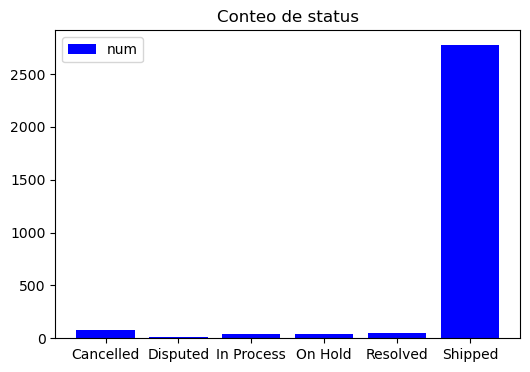

In [6]:
status_cats = sales_df.groupby('status').agg(num=('status', 'count'))
print(status_cats)

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(status_cats.index, status_cats['num'], color='blue', label='num')
ax.legend(loc='upper left')
ax.set_title('Conteo de status')

<Axes: ylabel='num'>

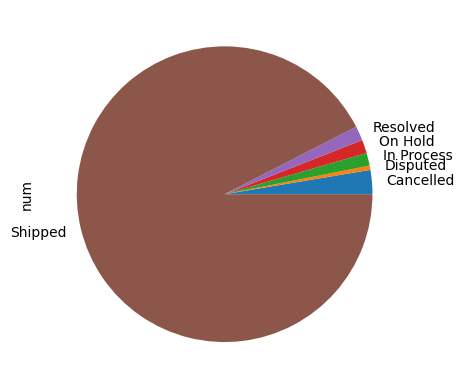

In [7]:
status_cats.plot(y='num', kind='pie', legend=False)

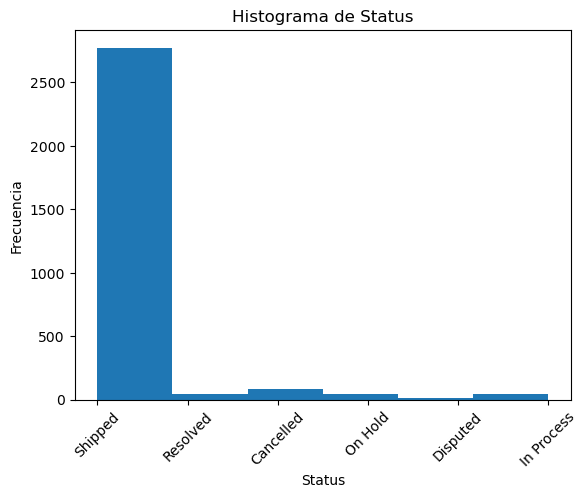

In [8]:
fig, ax = plt.subplots()
x = sales_df['status']
ax.hist(x, bins=len(sales_df['status'].unique()))
plt.title('Histograma de Status')
plt.xlabel('Status')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

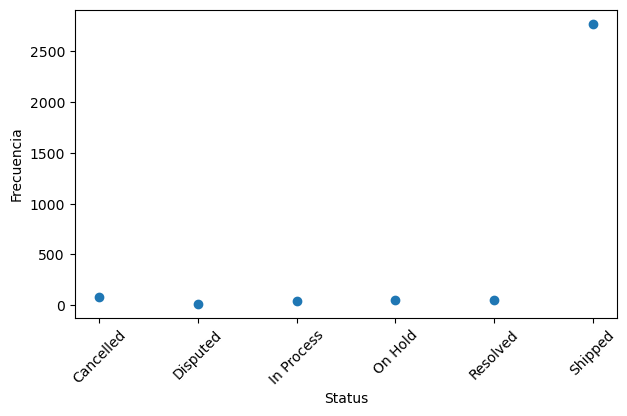

In [9]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.scatter(status_cats.index, status_cats['num'])
plt.xlabel('Status')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

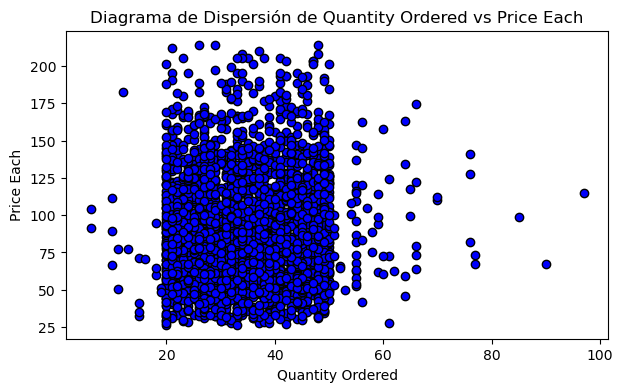

In [10]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.scatter(sales_df['quantityOrdered'], sales_df['priceEach'], color='blue', edgecolor='black')
ax.set_title('Diagrama de Dispersión de Quantity Ordered vs Price Each')
ax.set_xlabel('Quantity Ordered')
ax.set_ylabel('Price Each')
plt.show()

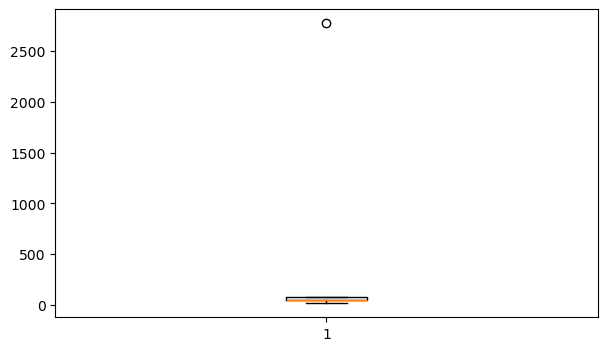

In [11]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.boxplot(status_cats)
plt.show()

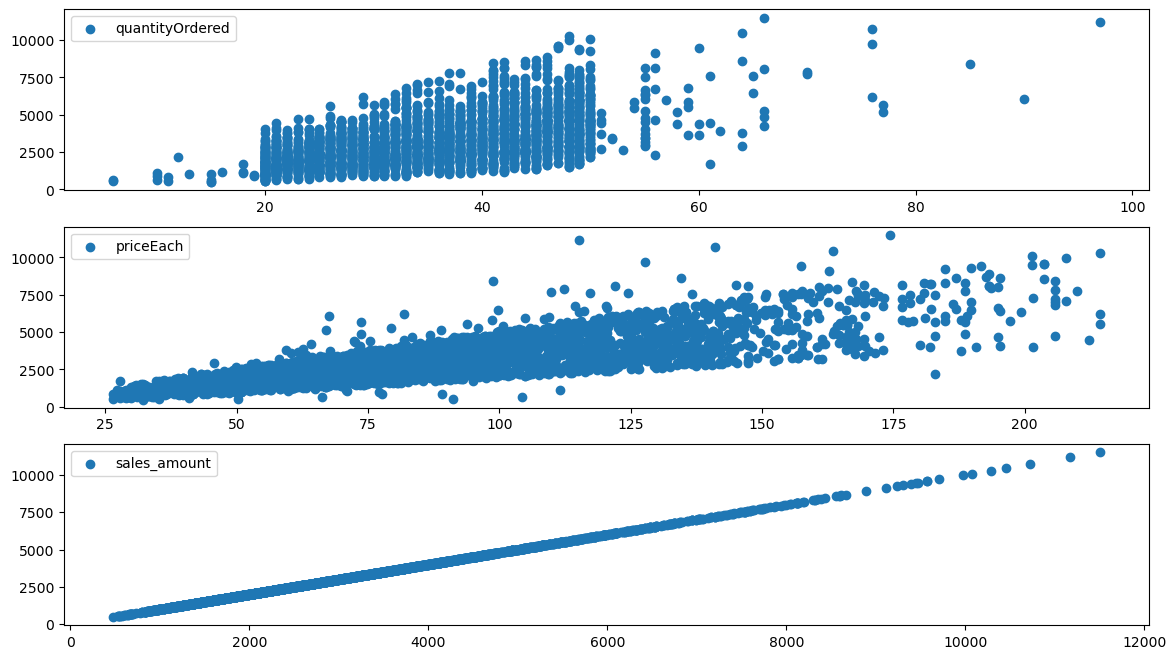

In [12]:
# scatter
variables = ['quantityOrdered', 'priceEach', 'sales_amount']

fig = plt.figure(figsize = (14, 8))

for i in range(0,3):
    fig.add_subplot(3, 1, i+1)
    ax = plt.scatter(sales_df[variables[i]], sales_df[variables[2]], label=variables[i])
    # plt.xlim(0.0, 100.0)
    plt.legend()
    
    
plt.show()

Text(0.5, 1.0, 'Histograma')

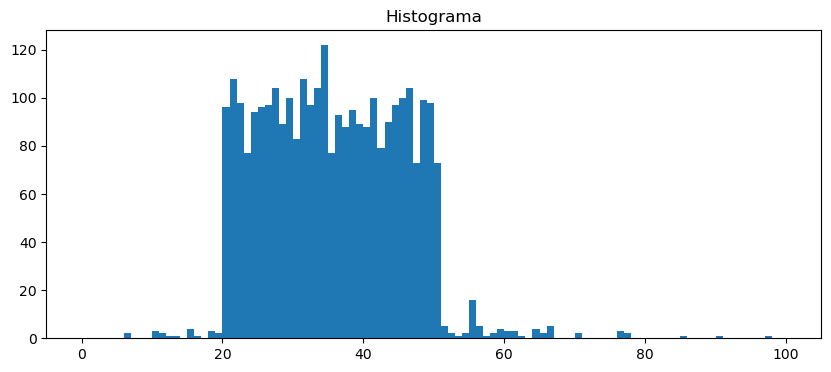

In [13]:
# histogramas
quantityOrdered = sales_df['quantityOrdered']

fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(quantityOrdered, np.arange(0, 101))

# ax.set_ylabel('Freq')
ax.set_title('Histograma')

<Axes: >

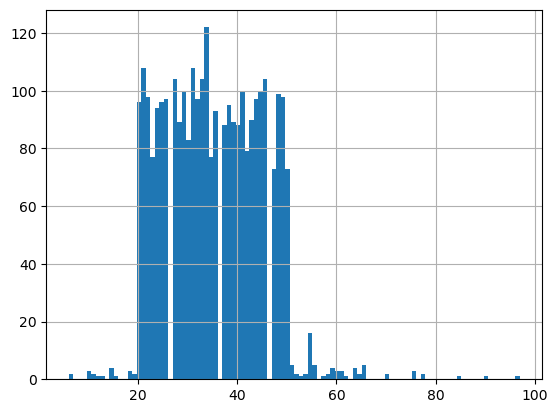

In [14]:
sales_df['quantityOrdered'].hist(bins=100)

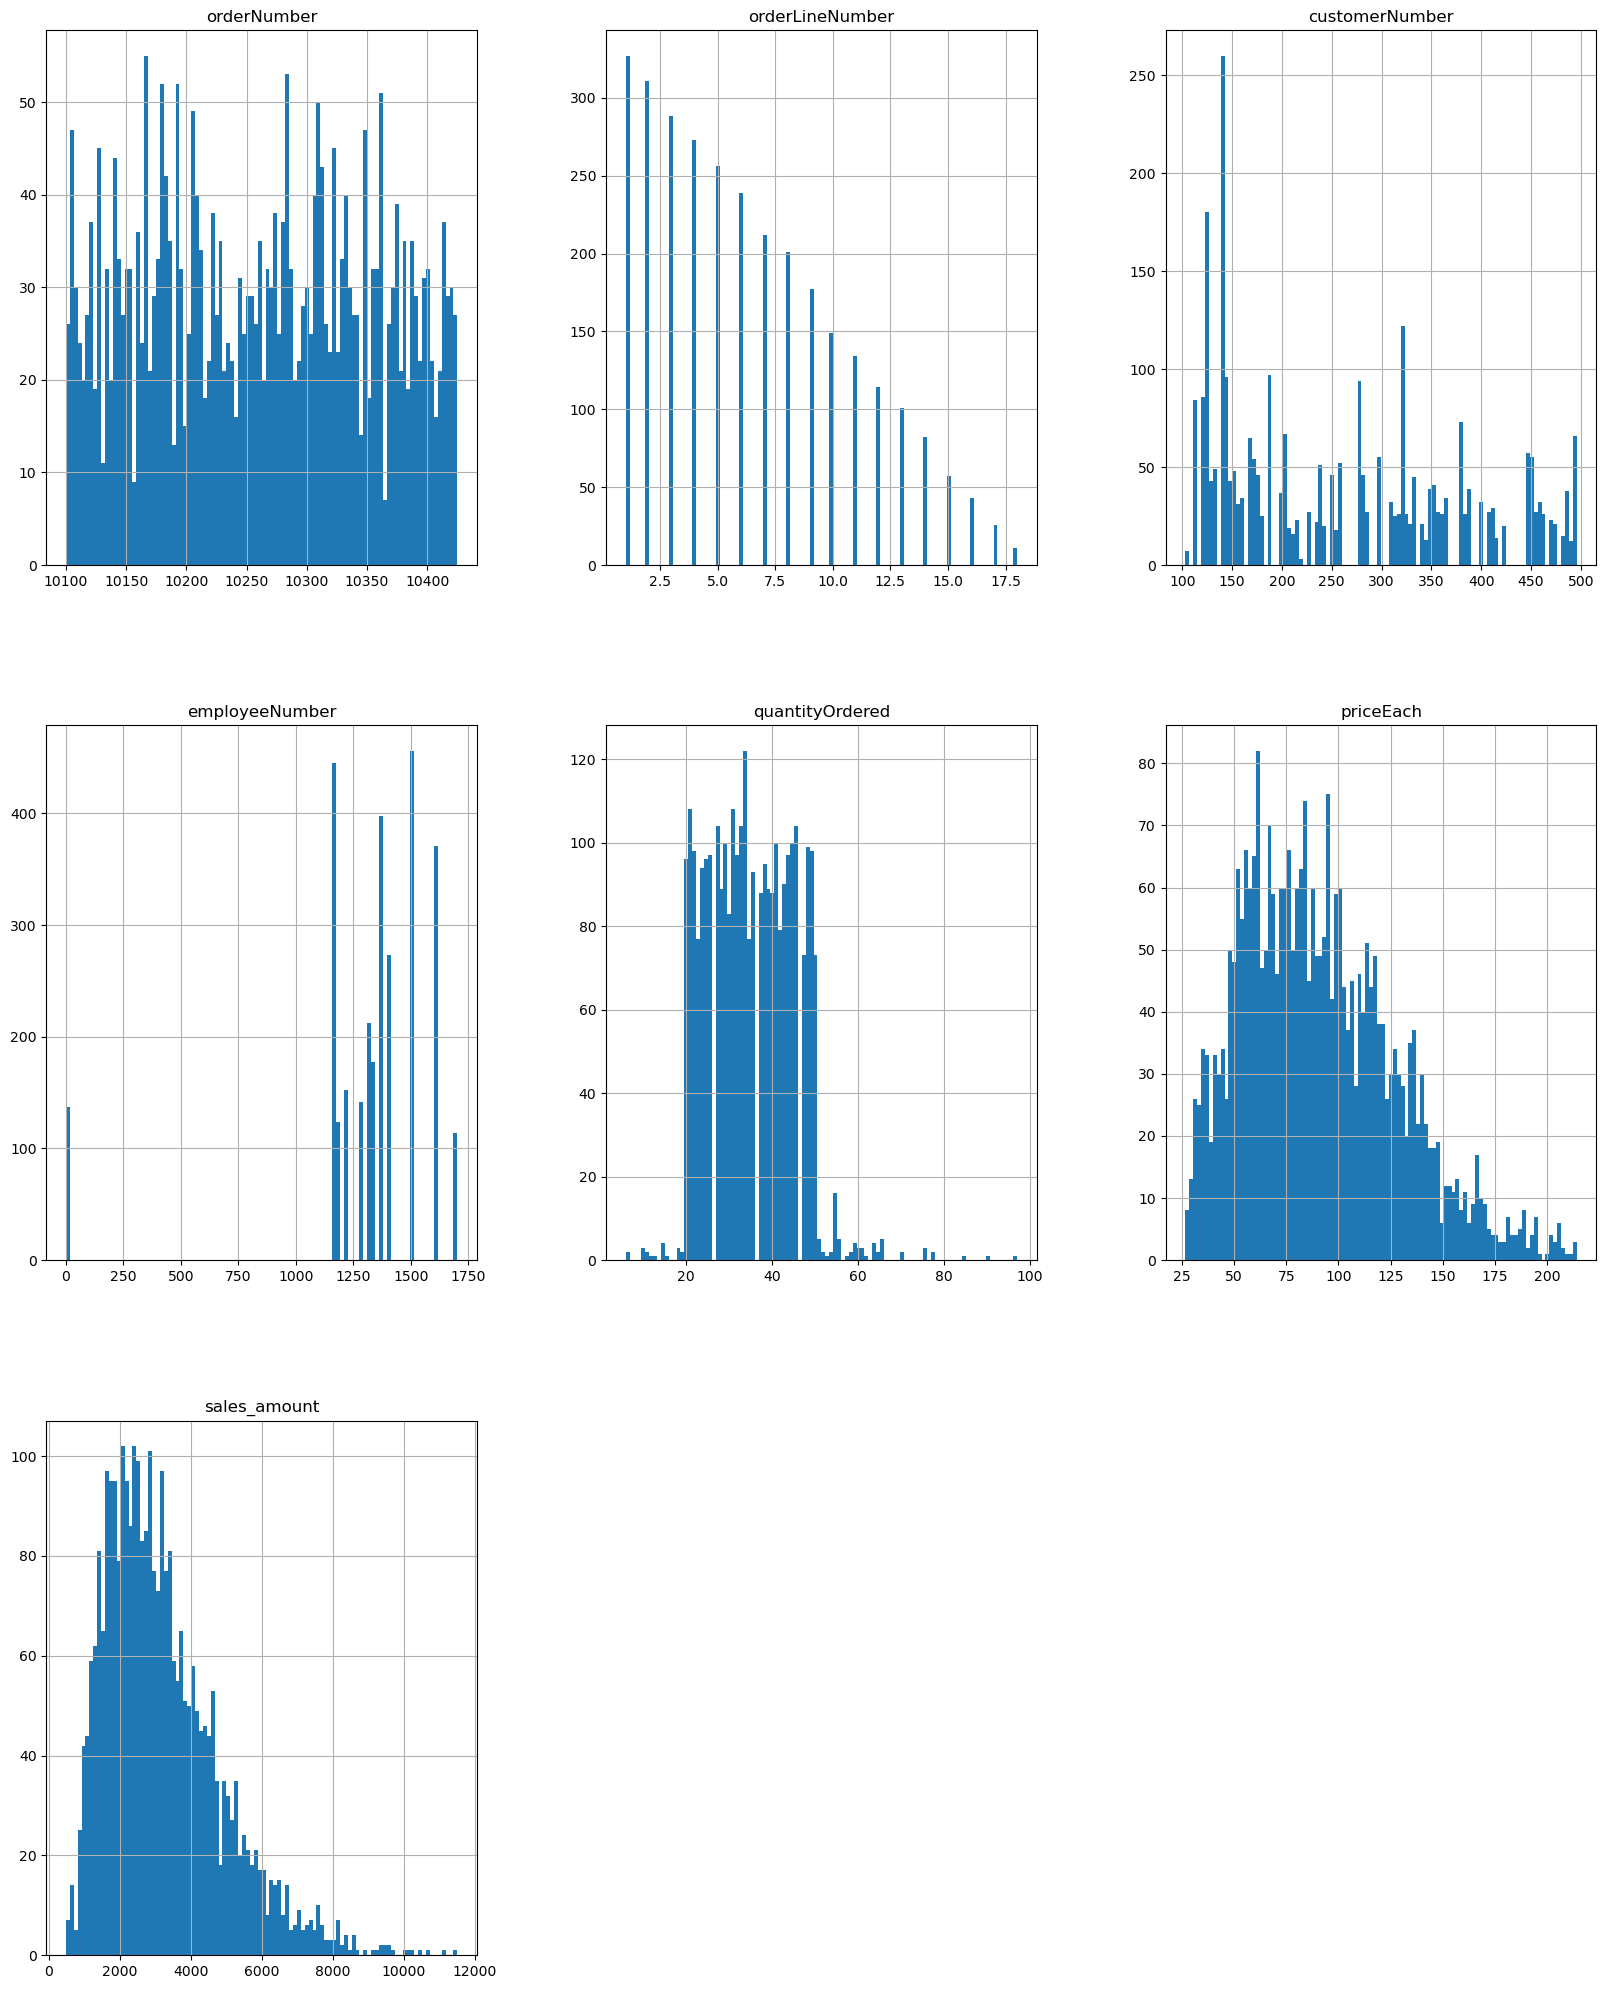

In [15]:
sales_df[sales_df['quantityOrdered'] >= 0].hist(bins=100, figsize=(20,25))
# plt.rcParams["figure.figsize"] = [20, 25]
plt.show()

<Axes: >

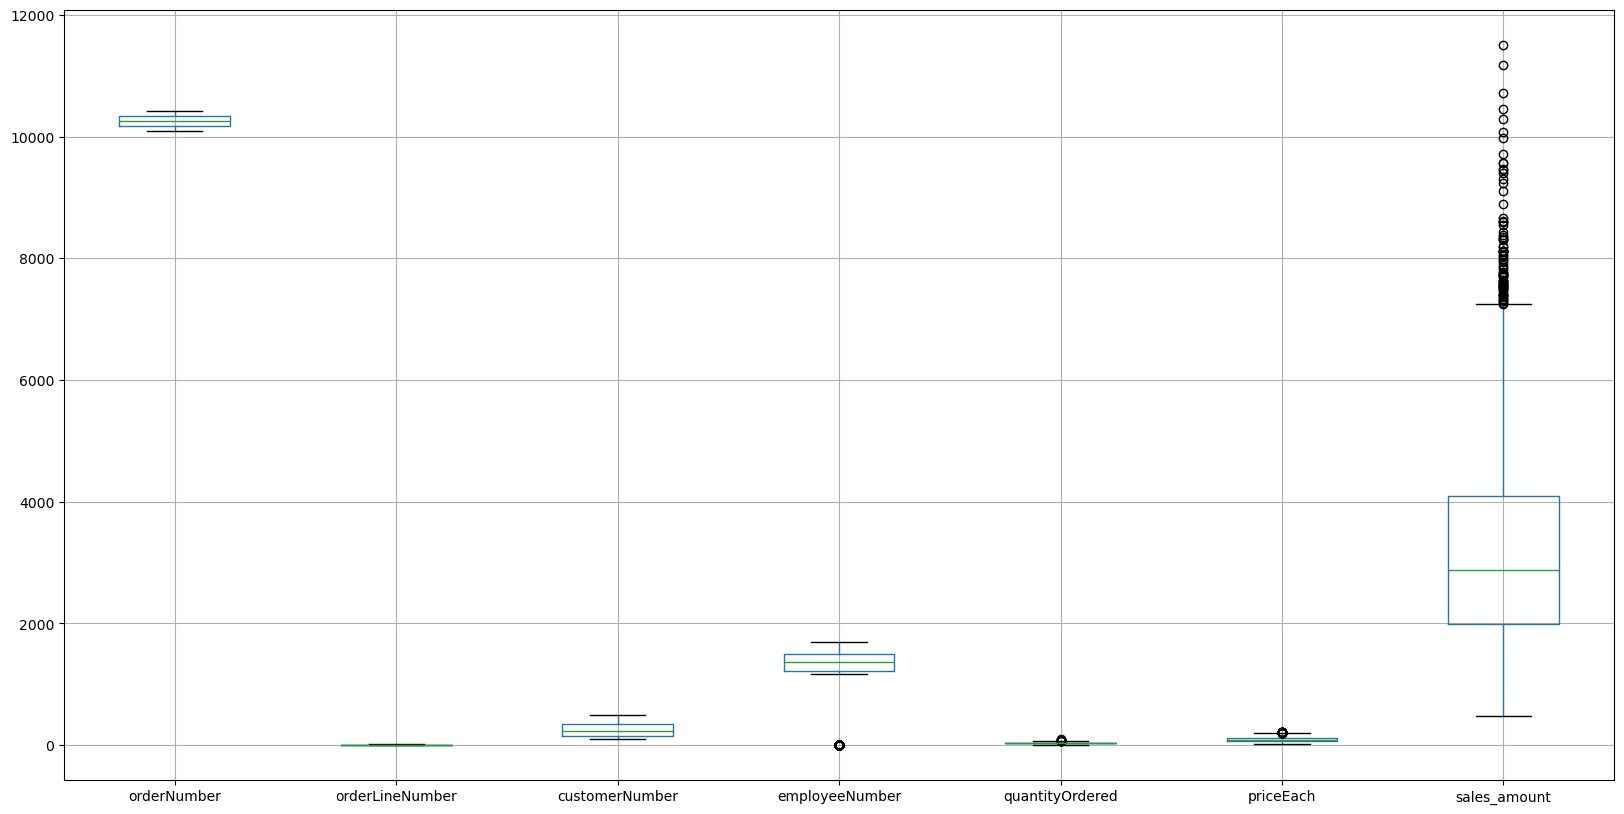

In [16]:
# boxplot
sales_df.boxplot(return_type='axes',figsize=(20,10))

<Axes: >

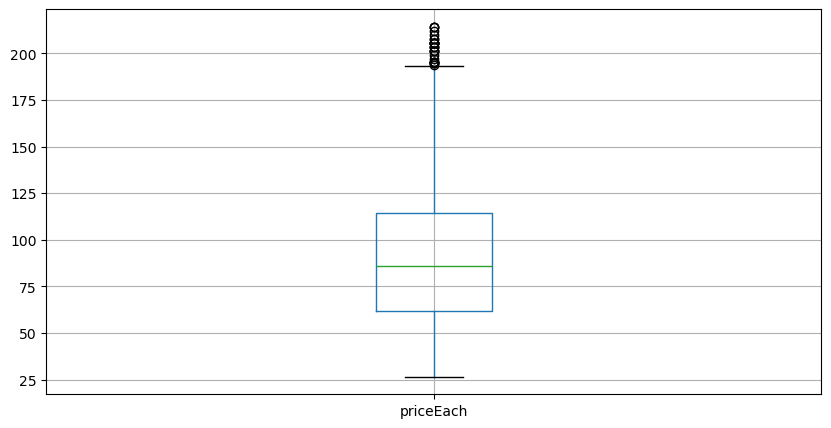

In [17]:
sales_df[['priceEach']].boxplot(return_type='axes',figsize=(10,5))

In [19]:
# heatmaps
sales_corr = sales_df.corr('pearson', numeric_only=True)
sales_corr.style.background_gradient(cmap='Blues')

,orderNumber,orderLineNumber,customerNumber,employeeNumber,quantityOrdered,priceEach,sales_amount
orderNumber,1.000000,-0.050853,-0.000871,0.112239,0.077880,-0.003917,0.041960
orderLineNumber,-0.050853,1.000000,-0.043279,-0.012187,-0.020396,-0.018829,-0.034630
customerNumber,-0.000871,-0.043279,1.000000,0.069613,0.019246,-0.027937,-0.008249
employeeNumber,0.112239,-0.012187,0.069613,1.000000,-0.023855,-0.009872,-0.021265
quantityOrdered,0.077880,-0.020396,0.019246,-0.023855,1.000000,0.024733,0.575010
priceEach,-0.003917,-0.018829,-0.027937,-0.009872,0.024733,1.000000,0.803276
sales_amount,0.041960,-0.034630,-0.008249,-0.021265,0.575010,0.803276,1.000000


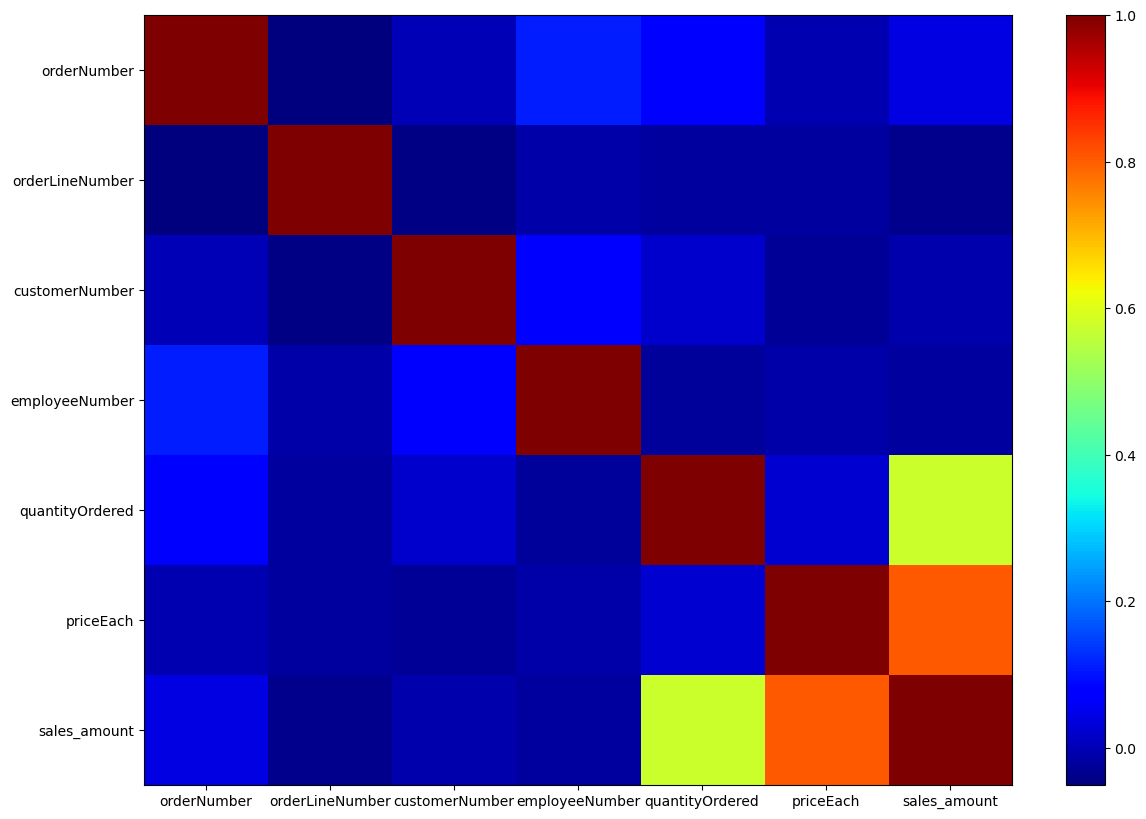

In [20]:
fig, ax = plt.subplots(figsize=(14, 10))
shw = ax.imshow(sales_corr, cmap='jet', aspect='auto')
bar = plt.colorbar(shw) 

# https://matplotlib.org/stable/users/explain/colors/colormaps.html
ax.set_yticks(np.arange(0, len(sales_corr.index), 1), sales_corr.index)
ax.set_xticks(np.arange(0, len(sales_corr.columns), 1), sales_corr.columns)

plt.show()